In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

Defining train and test

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


Removing null values

In [6]:
imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(train)
train = pd.DataFrame(imputer.transform(train),columns=('x','y'))

In [7]:
X_train = train.iloc[:,0:1].values
y_train = train.iloc[:,-1].values
X_test = test.iloc[:,0:1].values
y_test = test.iloc[:,-1].values

Generate regressor and fit the data

In [8]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Plotting the training data

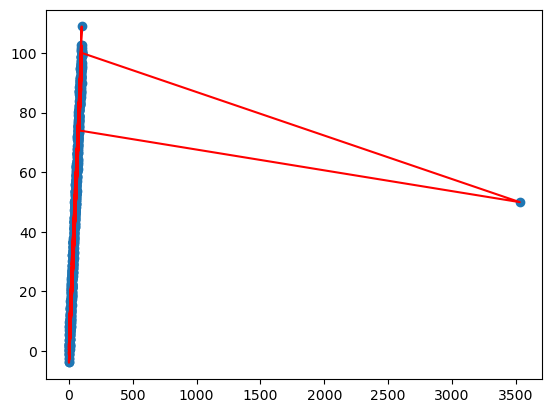

In [9]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train, 'r')
plt.show()

Plotting the testing data

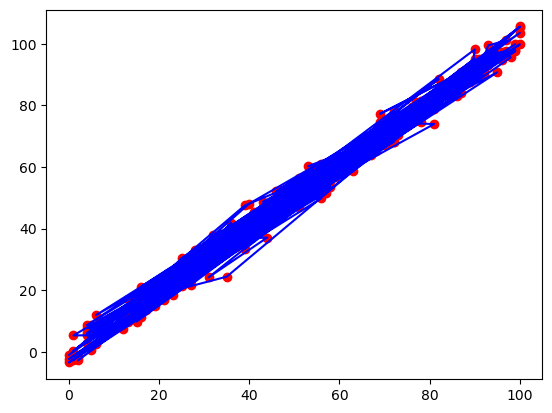

In [18]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_test, color='blue')
plt.show()

Doing this, you will get some unexpected graphics!
Because there is a value too high and must be deleted

In [27]:
# Hint: Run a loop to find the index of max vlaue
train[['x']].idxmax()

x    213
dtype: int64

Now we should delete the index of max value to make data more fit

In [29]:
train.drop(213,axis=0,inplace=True) # fill the index
X_train = train.iloc[:,0:1].values
y_train = train.iloc[:,-1].values
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Again,Plotting the training data

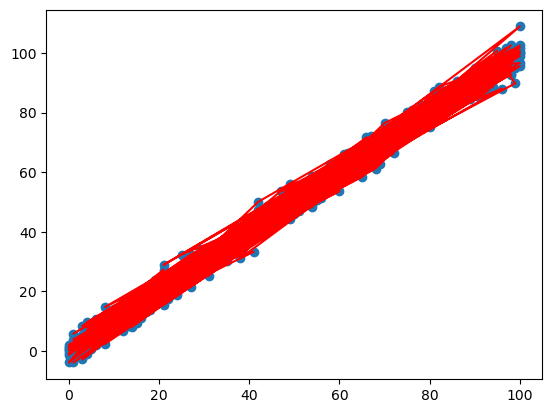

In [30]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train, 'r')
plt.show()

Again,Plotting the testing data

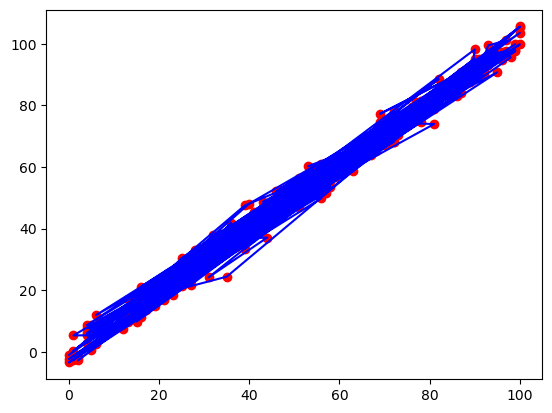

In [31]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_test, color='blue')
plt.show()